In [1]:
api_key = "320d3649d072d10f295c182cd1f3b068e4726ba8a78289d1e1881718b8d30d0d"

In [ ]:
https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=100

In [26]:
import requests

In [66]:
def get_crypto_hist(ticker):
    """
    makes request to cryptocompare to grab 100 day historical 
    trade value vs USD for BTC or ETH
    
    Arguments:
        ticker(string) -  BTC or ETH or BCH
    """
    ticker = ticker.upper()
    valid_tick = ["BTC", "ETH", "BCH"]
    
    if ticker in valid_tick: 
    
        url= f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={ticker}&tsym=USD&limit=100"
        url=url+f"&api_key={api_key}"

        res = requests.get(url)
        res = res.json()
        
        if res["Response"] == "Success":
            return res["Data"]["Data"]
        
        else:
            
            raise Error("Response not successful! Error from request: " + res["Response"])
    
    else:
        raise ValueError("You lack a valid ticker symbol (Use BTC, ETH, BCH)")
        
def preprocess(historical_list, ticker):
    #extract data
    
    df = pd.DataFrame(historical_list)
    df["conversionSymbol"] = ticker
    
    return df[["time", "close","conversionSymbol", "volumeto", "volumefrom"]]

def get_and_process(ticker):
    return preprocess(get_crypto_hist(ticker), ticker)

In [43]:
from pprint import pprint

In [60]:
pprint(toy[1])
# want close, time, conversionSymbol, volumediff`

{'close': 307.86,
 'conversionSymbol': '',
 'conversionType': 'direct',
 'high': 315.39,
 'low': 295.51,
 'open': 314.47,
 'time': 1563494400,
 'volumefrom': 163669.56,
 'volumeto': 50081406.36}


In [62]:
get_and_process("eth")

,time,close,conversionSymbol,volumeto,volumefrom
0,1563408000,225.85,eth,9.402744e+08,4163229.42
1,1563494400,221.30,eth,7.486286e+08,3382912.40
2,1563580800,228.75,eth,7.862826e+08,3437372.01
3,1563667200,225.39,eth,7.173821e+08,3182833.04
4,1563753600,217.15,eth,6.107801e+08,2812671.28
...,...,...,...,...,...
96,1571702400,171.38,eth,3.230591e+08,1885090.78
97,1571788800,162.53,eth,6.150865e+08,3784439.92
98,1571875200,161.02,eth,3.545701e+08,2202051.68
99,1571961600,181.66,eth,5.924185e+08,3261147.03


In [46]:
import pandas as pd

In [65]:
df = pd.concat([get_and_process("eth"),get_and_process("btc")], axis=0)
df

,time,close,conversionSymbol,volumeto,volumefrom
0,1563408000,225.85,eth,9.402744e+08,4163229.42
1,1563494400,221.30,eth,7.486286e+08,3382912.40
2,1563580800,228.75,eth,7.862826e+08,3437372.01
3,1563667200,225.39,eth,7.173821e+08,3182833.04
4,1563753600,217.15,eth,6.107801e+08,2812671.28
...,...,...,...,...,...
96,1571702400,8034.50,btc,2.005939e+08,24453.79
97,1571788800,7479.54,btc,4.576725e+08,60122.39
98,1571875200,7444.20,btc,2.136631e+08,28580.18
99,1571961600,8671.10,btc,6.565748e+08,79777.72


In [69]:
closings = df["close"]

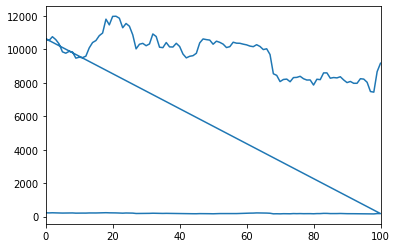

In [70]:
closings.plot()

In [103]:
from sklearn.preprocessing import LabelEncoder

In [105]:
encoder = LabelEncoder()

In [108]:
df["encoded"] = encoder.fit_transform(df["conversionSymbol"])

In [73]:
from sklearn.linear_model import LogisticRegression

In [121]:
y = df["encoded"].values.reshape(-1,1)
X = df.drop(columns=["conversionSymbol","encoded"])

In [122]:
model = LogisticRegression(solver="lbfgs")

In [113]:
df["encoded"].value_counts()

1    101
0    101
Name: encoded, dtype: int64

In [114]:
df["encoded"].isnull().sum()

0

In [115]:
df.duplicated().sum()

0

In [116]:
df["close"].isna().sum()

0

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [125]:
model.fit(X = X_train, y= y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
result = model.predict(X_test)

In [150]:
y_test_array= y_test.reshape(1,len(y_test))[0]

In [151]:
prediction_results = pd.DataFrame({
    "actual": y_test_array,
    "predicted":result
})

In [153]:
prediction_results.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1


In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [156]:
confusion_matrix(y_test_array, result)

array([[22,  0],
       [ 0, 29]])

In [157]:
accuracy_score(y_test_array, result)

1.0

In [158]:
classification_report(y_test_array, result)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        22\n           1       1.00      1.00      1.00        29\n\n    accuracy                           1.00        51\n   macro avg       1.00      1.00      1.00        51\nweighted avg       1.00      1.00      1.00        51\n'

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
class_model = RandomForestClassifier(n_estimators = 200)

In [162]:
class_model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
forest_predictions = class_model.predict(X_test)

In [165]:
accuracy_score(y_test_array, forest_predictions)

1.0

In [167]:
sorted(zip(class_model.feature_importances_, X.columns), reverse=True)

[(0.5039296350997167, 'close'),
 (0.4558688402378726, 'volumefrom'),
 (0.03648457327193778, 'volumeto'),
 (0.0037169513904729908, 'time')]